## Car Price Prediction using Linear Regression
## YBIF Handson Project-03
## Yada Roshik

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

In [3]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#shape of dataframe
df.shape

(4340, 9)

In [5]:
#information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [6]:
#Describe
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Get Categories and Counts of Categorical Variables

In [7]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Force               1
Isuzu               1
Daewoo              1
Kia                 1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                           
Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Maruti Alto LX                      35
Hyundai EON Era Plus                35
                                    ..
Maruti Alto 800 LXI Opt BSIV         1
Maruti Alto 800 LXI CNG              1
Maruti Alto 800 CNG LXI Optional     1
Maruti Alto 800 CNG LXI              1
Mahindra XUV500 W10 AWD              1
Length: 1491, dtype: int64

In [9]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [10]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [11]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [12]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [13]:
df[['Fuel','Seller_Type','Transmission','Owner']].value_counts()

Fuel      Seller_Type       Transmission  Owner               
Petrol    Individual        Manual        First Owner             892
Diesel    Individual        Manual        First Owner             835
Petrol    Individual        Manual        Second Owner            454
Diesel    Individual        Manual        Second Owner            453
          Dealer            Manual        First Owner             336
Petrol    Dealer            Manual        First Owner             306
Diesel    Individual        Manual        Third Owner             142
Petrol    Individual        Manual        Third Owner             130
Diesel    Dealer            Automatic     First Owner             114
Petrol    Dealer            Automatic     First Owner              80
Diesel    Individual        Automatic     First Owner              73
Petrol    Individual        Automatic     First Owner              67
Diesel    Dealer            Manual        Second Owner             56
Petrol    Trustmark Dealer 

In [14]:
#Get column Names
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
#Get Encoding of Categorical Features
df.replace({'Fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [16]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [17]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [19]:
#X=pd.get_dummies(X, columns=['Fuel','Seller_Type','Transmission','Owner'], drop_first=True)

### Define y (dependent or label or target variable) and X (independent or features or attribute Variable)

In [20]:
y=df['Selling_Price']

In [21]:
y.shape

(4340,)

In [22]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [23]:
X=df[['Year','KM_Driven','Fuel','Seller_Type','Transmission','Owner']]

In [24]:
#or use drop function to define X
#X=df.drop(['Brand','Model','Selling_Price'],axis=1)

In [25]:
X.shape

(4340, 6)

In [26]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


### Get Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=182529)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

### Get Model Train

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

### Get Model Prediction

In [33]:
y_pred=lr.predict(X_test)

In [34]:
y_pred.shape

(1302,)

In [35]:
y_pred

array([ 817162.92802672,  617685.31702045,  416810.66197768, ...,
         60305.8665009 ,  297750.25861959, -141001.0707583 ])

### Get Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [37]:
mean_squared_error(y_test,y_pred)

146053100939.92108

In [38]:
mean_absolute_error(y_test,y_pred)

224628.35148397222

In [39]:
r2_score(y_test,y_pred)

0.48515423688368464

### Get Visualization of Actual Vs Predicted Results

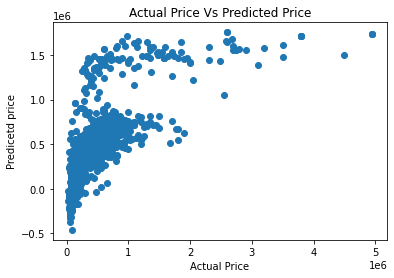

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicetd price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

### Get Future Predictions

In [41]:
df_new=df.sample(1)

In [42]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
3291,Hyundai,Hyundai i20 1.2 Asta Dual Tone,2018,740000,25000,0,0,0,0


In [43]:
df_new.shape

(1, 9)

In [44]:
X_new = df.drop(['Brand','Model','Selling_Price'],axis=1)

In [45]:
y_pred_new=lr.predict(X_new)

In [46]:
y_pred_new

array([ 39925.98246391,  52178.65390624, 431761.65710488, ...,
        96802.32704023, 594772.82142326, 411295.85397115])